In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn import linear_model

In [5]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data"
data = pd.read_csv(url, sep=",", header = None)
data.columns = ["type", "date", "time", "count"]
print data.head()
print '\n Data Types:'
print data.dtypes
print data.index

   type      date      time  count
0     7  07/24/05  00:00:00      0
1     9  07/24/05  00:00:00      0
2     7  07/24/05  00:30:00      1
3     9  07/24/05  00:30:00      0
4     7  07/24/05  01:00:00      0

 Data Types:
type      int64
date     object
time     object
count     int64
dtype: object
RangeIndex(start=0, stop=10080, step=1)


In [6]:
data = pd.read_csv(url, sep=",", header = None, names = ("type", "date", "time", "count"), parse_dates={'datetime': ['date', 'time']}, index_col='datetime')
print data.head()
print 'Data Types:'
print data.dtypes
print data.index

                     type  count
datetime                        
2005-07-24 00:00:00     7      0
2005-07-24 00:00:00     9      0
2005-07-24 00:30:00     7      1
2005-07-24 00:30:00     9      0
2005-07-24 01:00:00     7      0
Data Types:
type     int64
count    int64
dtype: object
DatetimeIndex(['2005-07-24 00:00:00', '2005-07-24 00:00:00',
               '2005-07-24 00:30:00', '2005-07-24 00:30:00',
               '2005-07-24 01:00:00', '2005-07-24 01:00:00',
               '2005-07-24 01:30:00', '2005-07-24 01:30:00',
               '2005-07-24 02:00:00', '2005-07-24 02:00:00',
               ...
               '2005-11-05 21:30:00', '2005-11-05 21:30:00',
               '2005-11-05 22:00:00', '2005-11-05 22:00:00',
               '2005-11-05 22:30:00', '2005-11-05 22:30:00',
               '2005-11-05 23:00:00', '2005-11-05 23:00:00',
               '2005-11-05 23:30:00', '2005-11-05 23:30:00'],
              dtype='datetime64[ns]', name=u'datetime', length=10080, freq=None)


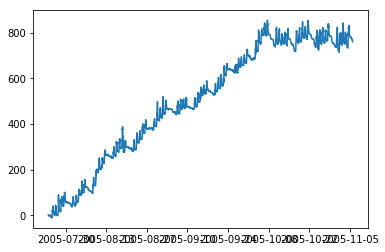

In [7]:
# Calculating the number of people in the building at different point of time in a day.
OUTFLOW_ID = 7
ppl_inside = 0
y_arr = np.zeros((0, 2))
i = 0;
for index, row in data.iterrows():
    if row['type'] == OUTFLOW_ID:
        ppl_inside -= row['count']
    else:
        ppl_inside += row['count'] 
    if(i % 2 != 0):
        y_arr = np.vstack((y_arr, [index, ppl_inside]))
    i+=1;
    
plt.plot(y_arr[:,0], y_arr[:,1])
plt.show()

In [8]:
ts = data['count']
ts.head(10)

datetime
2005-07-24 00:00:00    0
2005-07-24 00:00:00    0
2005-07-24 00:30:00    1
2005-07-24 00:30:00    0
2005-07-24 01:00:00    0
2005-07-24 01:00:00    0
2005-07-24 01:30:00    0
2005-07-24 01:30:00    0
2005-07-24 02:00:00    0
2005-07-24 02:00:00    0
Name: count, dtype: int64

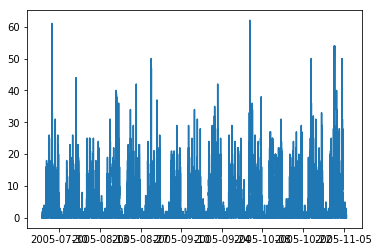

In [9]:
plt.plot(ts)
plt.show()

In [10]:
ys = np.array([ts[i] for i in  xrange(0,len(ts))])
EMOV_n = pd.Series(ys).ewm(com=2).mean()
print EMOV_n

0        0.000000
1        0.000000
2        0.473684
3        0.276923
4        0.170616
5        0.108271
6        0.069937
7        0.045678
8        0.030045
9        0.019854
10       0.687622
11       0.456635
12       0.303637
13       0.202077
14       0.134564
15       0.089641
16       0.059730
17       0.039807
18       0.026532
19       0.017685
20       0.011789
21       0.007859
22       0.005239
23       0.003493
24       0.002328
25       0.001552
26       0.001035
27       0.000690
28       0.000460
29       0.000307
           ...   
10050    0.536848
10051    1.024565
10052    1.016377
10053    0.677584
10054    0.451723
10055    0.301149
10056    0.534099
10057    0.356066
10058    0.237377
10059    0.158252
10060    0.772168
10061    0.514778
10062    0.676519
10063    0.451013
10064    0.634008
10065    0.422672
10066    0.948448
10067    0.632299
10068    0.421533
10069    0.281022
10070    0.187348
10071    0.124899
10072    1.083266
10073    0.722177
10074    0

In [11]:
Xs = np.ones(len(ys))
print np.shape(Xs)

(10080,)


In [12]:
print np.shape(np.hstack((Xs, EMOV_n)))
# print np.shape(np.vstack())
print len(EMOV_n)


(20160,)
10080


In [13]:
EMOV_n = EMOV_n.reshape(-1,1)
ys = ys.reshape(-1,1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [14]:
# LINEAR Regression
clf = linear_model.LinearRegression()
clf.fit(EMOV_n, ys)
print clf.coef_
print np.mean(clf.predict(EMOV_n) - ys)

[[ 1.05286132]]
2.24159315448e-16


In [15]:
# RIDGE Regression
reg = linear_model.Ridge (alpha = 0.1)
reg.fit (EMOV_n, ys)
print reg.coef_
print np.mean(reg.predict(EMOV_n) - ys)

[[ 1.05286098]]
1.2547282437e-16


In [55]:
# Finding the week of the day
weeknames = []
for i in xrange (0, len(y_arr)):
    weeknames.append(y_arr[i, 0].weekday_name)
    weeknames.append(y_arr[i, 0].weekday_name)
    
calendar_days = []
for i in xrange (0, len(y_arr)):
    calendar_days.append(y_arr[i, 0].days_in_month)
    calendar_days.append(y_arr[i, 0].days_in_month)
    
month_numbers = []
for i in xrange (0, len(y_arr)):
    month_numbers.append(y_arr[i, 0].month)
    month_numbers.append(y_arr[i, 0].month)
    
weeknames = np.array(weeknames).reshape(-1,1)
calendar_days = np.array(calendar_days).reshape(-1,1)
month_numbers = np.array(month_numbers).reshape(-1,1)
Xtrain = EMOV_n
#Xtrain = np.hstack((Xtrain, weeknames))
Xtrain = np.hstack((Xtrain, calendar_days))
Xtrain = np.hstack((Xtrain, month_numbers))

In [56]:
# LINEAR Regression
clf = linear_model.LinearRegression()
clf.fit(Xtrain, ys)
print clf.coef_
print np.mean(clf.predict(Xtrain) - ys)

[[ 1.05324015 -0.0034152  -0.02458197]]
-3.90375562563e-15


In [58]:
# RIDGE Regression
reg = linear_model.Ridge (alpha = 0.1)
reg.fit (Xtrain, ys)
print reg.coef_
print np.mean(reg.predict(Xtrain) - ys)

[[ 1.05323981 -0.00341489 -0.02458156]]
-4.17866799364e-15


In [37]:
#Calculating holiday or not
from pandas.tseries.holiday import USFederalHolidayCalendar

df = pd.DataFrame()
#df['Date'] = y_arr[:,0]
df['Date'] = pd.date_range(start='2005-07-24', end='2005-11-05')

# df['Date'] = pd.date_range(start='2005-07-24', end='2005-11-05')
holiday_cal = USFederalHolidayCalendar()
holidays = holiday_cal.holidays(start='2005-07-24', end='2005-11-05')

df['Holiday'] = df['Date'].isin(holidays)
print df

# h_df = []
# for i in xrange(0, len(y_arr)):
#     print type(y_arr[i,0])
#     h_df.append(y_arr[i,0].isin(holidays))
# df['Holiday'] = h_df
# print df

          Date  Holiday
30  2005-08-23    False
31  2005-08-24    False
32  2005-08-25    False
33  2005-08-26    False
34  2005-08-27    False
35  2005-08-28    False
36  2005-08-29    False
37  2005-08-30    False
38  2005-08-31    False
39  2005-09-01    False
40  2005-09-02    False
41  2005-09-03    False
42  2005-09-04    False
43  2005-09-05     True
44  2005-09-06    False
45  2005-09-07    False
46  2005-09-08    False
47  2005-09-09    False
48  2005-09-10    False
49  2005-09-11    False
50  2005-09-12    False
51  2005-09-13    False
52  2005-09-14    False
53  2005-09-15    False
54  2005-09-16    False
55  2005-09-17    False
56  2005-09-18    False
57  2005-09-19    False
58  2005-09-20    False
59  2005-09-21    False
..         ...      ...
75  2005-10-07    False
76  2005-10-08    False
77  2005-10-09    False
78  2005-10-10     True
79  2005-10-11    False
80  2005-10-12    False
81  2005-10-13    False
82  2005-10-14    False
83  2005-10-15    False
84  2005-10-16  

In [ ]:
Xtest = pd.date_range(start='2005-11-06', end='2005-11-10')
